In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
--2019-04-25 15:39:02--  https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpad.net (launchpad.net)... 91.189.89.222, 91.189.89.223, 2001:67c:1560:8003::8004, ...
Connecting to launchpad.net (launchpad.net)|91.189.89.222|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-04-25 15:39:02 ERROR 404: Not Found.

dpkg: error: cannot access archive 'google-drive-ocaml

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
!pip install tensorflow-gpu==2.0.0-alpha0

    100% |████████████████████████████████| 332.1MB 56kB/s 
    100% |████████████████████████████████| 61kB 26.8MB/s 
    100% |████████████████████████████████| 419kB 8.8MB/s 
    100% |████████████████████████████████| 3.0MB 8.9MB/s 


In [0]:
import cv2
import numpy as np
from tqdm import tqdm 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

In [0]:
def load_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    return files

In [0]:
def ext_img(img):
    im = cv2.imread(img)
    im = cv2.resize(im,(224,224))
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im  = im/255
    return im

In [0]:
def tensor4d(files):
    list_imgs = [ext_img(im) for im in tqdm(files)]
    return np.stack(list_imgs,axis=0)
    

In [0]:
fold_path = 'drive/datasets/dog images/test'

In [0]:
img_files = load_data(fold_path)

In [10]:
imgs = tensor4d(img_files)

100%|██████████| 836/836 [00:08<00:00, 100.53it/s]


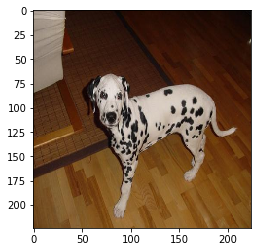

In [11]:
plt.imshow(imgs[0])
plt.show()

In [0]:
inps = imgs.copy()

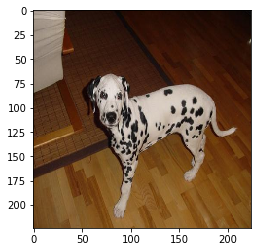

In [13]:
plt.imshow(inps[0])
plt.show()

In [0]:
def modified(inp_imgs):
    iimgs = inp_imgs
    iimgs[:,100:150,100:150,:] = 0 
    return iimgs
    

In [0]:
mod_imgs = modified(imgs)

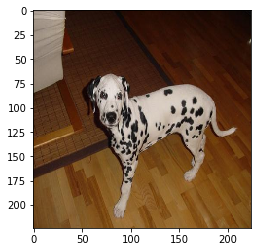

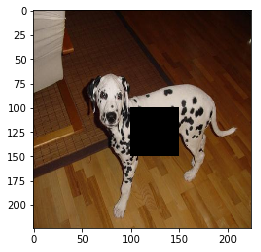

In [16]:
plt.imshow(inps[0])
plt.show()
plt.imshow(mod_imgs[0])
plt.show()

In [17]:
!nvidia-smi

Thu Apr 25 15:51:03 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    15W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  